# How to Hide an Image

For this project, we will look into steganography. Initially, we will start with simple examples omn how to hide an image with simple approaches. This website will be used as a reference:

https://towardsdatascience.com/steganography-hiding-an-image-inside-another-77ca66b2acb1

In this website , they about changing the least significant bits to hide an image. 

For this example we will use two images, one of la Ciudad de Medellin and Duomo in Milan. Both images are from wikipedia.

In [1]:
import os
import numpy as np
from PIL import Image, ImageOps
from tqdm import tqdm_notebook, tqdm
import glob

import matplotlib.pyplot as plt
%matplotlib notebook

Load hoast and guest image, both in RGB and grayscale

In [2]:
imgHost = Image.open("medellin.jfif")
imgHostGray = Image.open("medellin.jfif").convert('LA')
imgHostGray = ImageOps.grayscale(imgHostGray) 
imgHost = np.array(imgHost) #Host Image (RGB)
imgHostGray = np.array(imgHostGray) #Host Image (GrayScale)
img = Image.fromarray(imgHostGray) #Save grayscale host
img.save('medellin_gray.jfif', 'JPEG')

imgGuest = Image.open("duomo.jfif")
imgGuestGray = Image.open("duomo.jfif").convert('LA')
imgGuestGray = ImageOps.grayscale(imgGuestGray) 
imgGuest = np.array(imgGuest) #Guest Image (RGB)
imgGuestGray = np.array(imgGuestGray) #Guest Image (GrayScale)
img = Image.fromarray(imgGuestGray) #Save grayscale guest
img.save('duomo_gray.jfif', 'JPEG')

Plot images

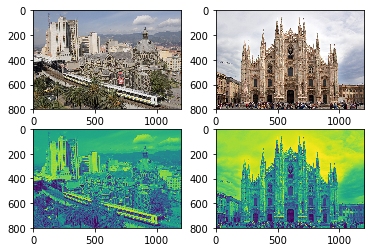

In [3]:
plt.figure()
plt.subplot(2,2,1)
plt.imshow(imgHost)
plt.subplot(2,2,2)
plt.imshow(imgGuest)
plt.subplot(2,2,3)
plt.imshow(imgHostGray)
plt.subplot(2,2,4)
plt.imshow(imgGuestGray)

The image of Duomo (right) is going to be hidden inside the image of Medellin (right). First, we check the size of the images, 

In [4]:
# Check images sizes with RGB format

imgSizeHost = imgHost.shape
imgSizeGuest = imgGuest.shape

# Host Image must be always larger than guest image

if (imgSizeHost[0] < imgSizeGuest[0]) or ((imgSizeHost[1] < imgSizeGuest[1])):
    print("Host Image smaller than guest Image")
else:
    print("Host Image can accomodate guest Image")
    print("Img1: ", imgSizeHost, "Img2: ", imgSizeGuest)
        
# make sure they are have teh same size
if (imgSizeHost[0] > imgSizeGuest[0]):
    imgHost = imgHost[0:imgSizeGuest[0],:,:]
if (imgSizeHost[1] > imgSizeGuest[1]):
    imgHost = imgHost[:0:imgSizeGuest[1],:]
print("Img1: ", imgHost.shape, "Img2: ", imgGuest.shape)    

Host Image can accomodate guest Image
Img1:  (800, 1200, 3) Img2:  (799, 1200, 3)
Img1:  (799, 1200, 3) Img2:  (799, 1200, 3)


In [5]:
# Check images sizes with grayscale format

imgSizeHostGray = imgHostGray.shape
imgSizeGuestGray = imgGuestGray.shape

# Host Image must be always larger than guest image
if (imgSizeHostGray[0] < imgSizeGuestGray[0]) or ((imgSizeHostGray[1] < imgSizeGuestGray[1])):
    print("Host Image smaller than guest Image")
else:
    print("Host Image can accomodate guest Image")
    print("Img1: ", imgSizeHostGray, "Img2: ", imgSizeGuestGray)
        
# make sure they are have teh same size
if (imgSizeHostGray[0] > imgSizeGuestGray[0]):
    imgHostGray = imgHostGray[0:imgSizeGuestGray[0],:]
if (imgSizeHostGray[1] > imgSizeGuestGray[1]):
    imgHostGray = imgHostGray[:0:imgSizeGuestGray[1]]
print("Img1: ", imgHostGray.shape, "Img2: ", imgGuestGray.shape)    

Host Image can accomodate guest Image
Img1:  (800, 1200) Img2:  (799, 1200)
Img1:  (799, 1200) Img2:  (799, 1200)


Check how the images changed when you remove the last x significant bits on the host and guest image

In [27]:
# (255&~(1<<(8-1)))+1
((255>>3)<<3)

248

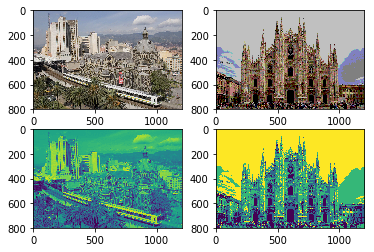

In [6]:
#newImgHost = (imgHost[:,:,:]>>4)<<4
#newImgGuest = (imgGuest[:,:,:]>>4)<<4
bits = 1 # Number of bits that we want to use 
maskHost = (255&~(1<<bits))+1
maskGuest = (255&~(1<<(8-bits)))+1
# RGB
newImgHost = imgHost[:,:,:]&maskHost
newImgGuest = imgGuest[:,:,:]&maskGuest
# Grayscale
newImgHostGray = imgHostGray[:,:]&maskHost
newImgGuestGray = imgGuestGray[:,:]&maskGuest


plt.figure()
# RGB
plt.subplot(2,2,1)
plt.imshow(newImgHost)
img = Image.fromarray(newImgHost, 'RGB')
img.save('medellin_red.jfif', 'JPEG')
plt.subplot(2,2,2)
plt.imshow(newImgGuest)
img = Image.fromarray(newImgGuest, 'RGB')
img.save('duomo_red.jfif', 'JPEG')
# Grayscale
plt.subplot(2,2,3)
plt.imshow(newImgHostGray)
img = Image.fromarray(newImgHostGray)
img.save('medellin_redGray.jfif', 'JPEG')
plt.subplot(2,2,4)
plt.imshow(newImgGuestGray)
img = Image.fromarray(newImgGuestGray)
img.save('duomo_redGray.jfif', 'JPEG')
#plt.subplot(1,4,3)
#plt.imshow(newImgHost1)
#plt.subplot(1,4,4)
#plt.imshow(newImgGuest1)

In [20]:
#For Testing
#197[500,0,0] = 11000101 192
#133[1,0,0]   = 10000101
ch = 1
row = np.arange(1,5)
col = np.arange(1,5)
#print(imgHost[500:505,671:676,ch])
#print(imgGuest[500:505,671:676,ch])
#print((imgHost[500:505,671:676,ch]>>4)<<4)
#print((imgGuest[500:505,671:676,ch]>>4))
#print(((imgHost[500:505,671:676,ch]>>4)<<4)^(imgGuest[500:505,671:676,ch] >> 4))
(204&15)<<4
imgHost.ndim

3

Need to create a function that will change the least significant bits of the host image with the most significant bits of the guest image. This must be done with all 3 channels if image is on RGB format. Try try changing 1,2,3,4 bits and observe the difference. 

In [7]:
def hide_image(imgH, imgG,bits):
    # Hide image in the least significant bits of host image
    # 240 = 11110000
    # 16  = 00001111 
    newImg = imgG
    imgSize = imgG.shape
    #Iterate through host image dimensions to change pixels' bits
    if imgH.ndim == 3: # 3 dimensions image (RGB)
        for i in np.arange(imgSize[2]):
            #Iterate through channels
            #newImg[:,:,i] = ((imgH[0:imgSize[0],0:imgSize[1],i]>>bits)<<bits)^(imgG[0:imgSize[0],0:imgSize[1],i]>>bits)
            newImg[:,:,i] = ((imgH[:,:,i]>>bits)<<bits)^(imgG[:,:,i]>>(8-bits))
    else: # 2 dimesnions image (graysacle)
        #newImg[:,:] = ((imgH[0:imgSize[0],0:imgSize[1]]>>bits)<<bits)^(imgG[0:imgSize[0],0:imgSize[1]]>>bits)
        newImg[:,:] = ((imgH[:,:]>>bits)<<bits)^(imgG[:,:]>>(8-bits))          
    return newImg

        
    

The image is not fully hidden, there is a residual of Duomo clearly seen on the light sections of the Medellin

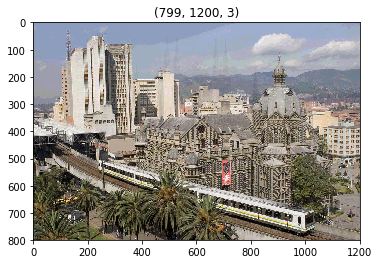

In [8]:
#bits = 4
secretImg = hide_image(imgHost, imgGuest,bits)
img = Image.fromarray(secretImg, 'RGB')
img.save('secret_image_4.jfif', 'JPEG')
plt.figure()
plt.title(str(secretImg.shape))
plt.imshow(secretImg)

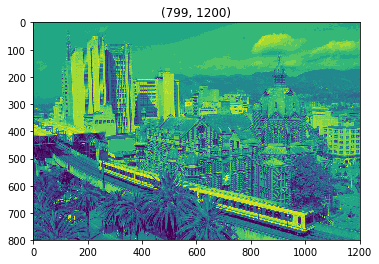

In [41]:
#GrayScale
#bits = 4
secretImgGray = hide_image(imgHostGray, imgGuestGray,bits)
img = Image.fromarray(secretImgGray)
img.save('secret_image_gray_1.jfif', 'JPEG')
plt.figure()
plt.title(str(secretImgGray.shape))
plt.imshow(secretImgGray)

## Recover Images

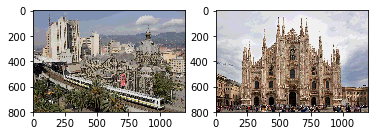

In [9]:
#bits = 1
maskHost = (255&~(1<<bits))+1
maskGuest = (255&~(1<<(8-bits)))+1

recoverHost = (secretImg[:,:,:]&240)
recoverGuest = (secretImg[:,:,:]&3)<<6

plt.figure()
plt.subplot(1,2,1)
plt.imshow(recoverHost)
img = Image.fromarray(recoverHost)
img.save('recover_medellin.jfif', 'JPEG')
plt.subplot(1,2,2)
plt.imshow(recoverGuest)
img = Image.fromarray(recoverGuest)
img.save('recover_duomo.jfif', 'JPEG')

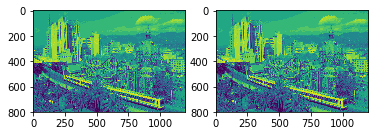

In [43]:
# Gray scale
recoverHostGray = (secretImgGray[:,:]&240)
recoverGuestGray = (secretImgGray[:,:]&15)<<4

plt.figure()
plt.subplot(1,2,1)
plt.imshow(recoverHostGray)
plt.subplot(1,2,2)
plt.imshow(recoverGuestGray)